In [60]:
# some setup 

import random
import numpy as np
import matplotlib.pyplot as plt
import knn
import images_loader

# This is a bit of magic to make matplotlib figures appear inline in the notebook
# rather than in a new window.
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [61]:
# read training data 
fol = '../missiles/'
imgs3m = images_loader.mltpl3(fol + '*')
im_shpae = imgs3m[0].shape
print(im_shpae)

X_t = []
for img in imgs3m:
    X_t.append(np.reshape(img, (1, -1)))

X_train = np.concatenate(X_t)
y_train = np.array([0, 1, 2]) # {david sling, iron dome, fateh 110}



(895, 616, 3)


float32
(895, 616, 3)


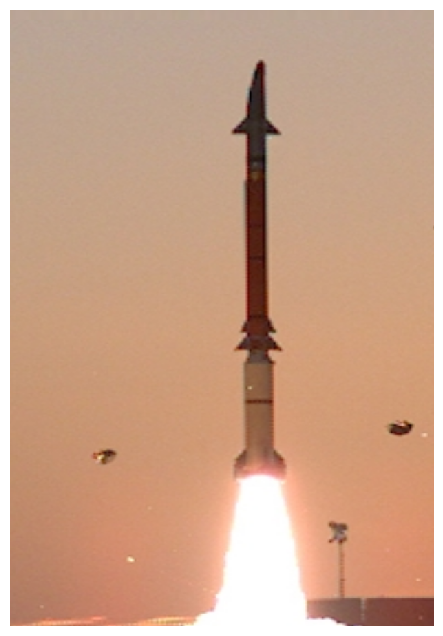

float32
(895, 616, 3)


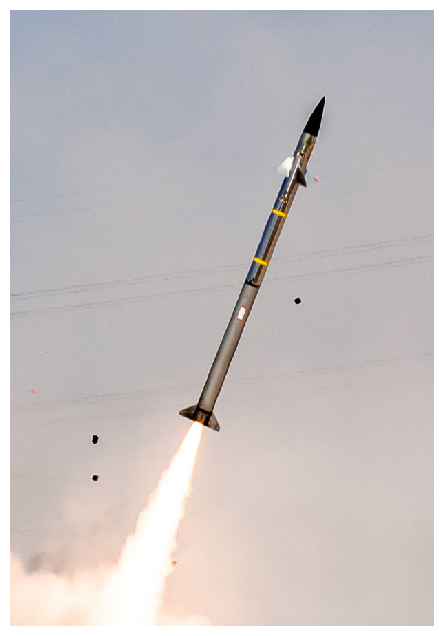

float32
(895, 616, 3)


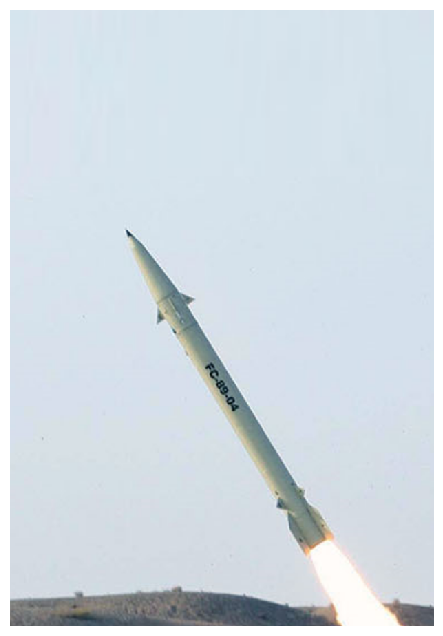

In [62]:
# show the training images 
for im in imgs3m:
    print(im.dtype)
    print(im.shape)
    # display the array of pixels as an image
    plt.imshow(im)
    plt.axis('off')
    plt.show()

In [63]:
# Create a kNN classifier instance. 
classifier = knn.knn()
classifier.train(X_train, y_train)

float32
(895, 616, 3)


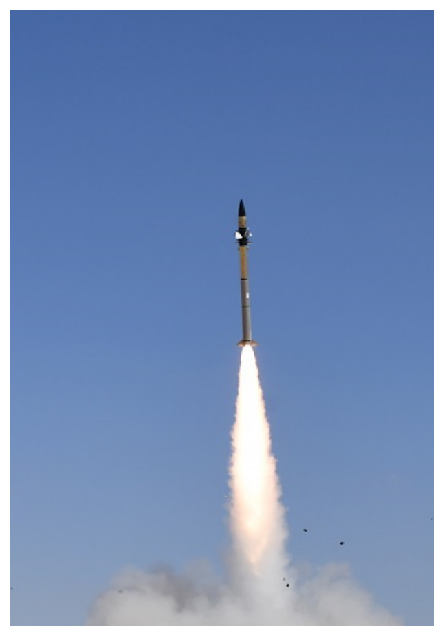

In [64]:
# read and show the test image 

f = '../irondome_test.png'
im = images_loader.sngl3(f)

X_test = np.reshape(im, (1, -1))
y_test = 1

print(im.dtype)
print(im.shape)
# display the array of pixels as an image
plt.imshow(im)
plt.axis('off')
plt.show()


In [65]:
# k = 1
dists = classifier.calc_distances(X_test)
y_test_pred = classifier.predict_labels(dists, k = 1)
num_test = 1

# Compute and print the fraction of correctly predicted examples
num_correct = np.sum(y_test_pred == y_test)
accuracy = float(num_correct) / num_test
print('Got %d / %d correct => accuracy: %f' % (num_correct, num_test, accuracy))
print('Got %d / %d correct => accuracy: %.0f%%' % (num_correct, num_test, accuracy * 100))

Got 1 / 1 correct => accuracy: 1.000000
Got 1 / 1 correct => accuracy: 100%


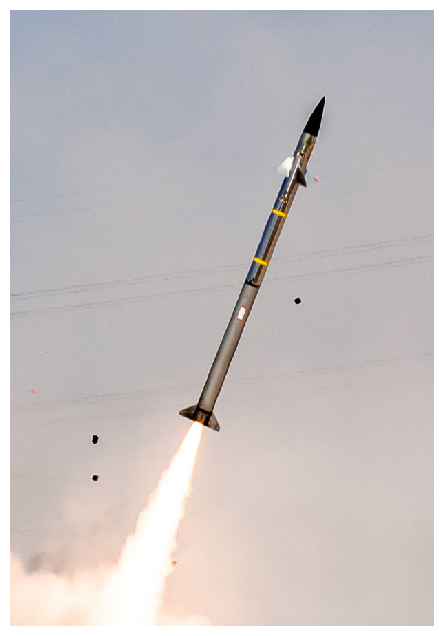

In [66]:
# show the predicted image 

prdct_img = np.reshape(X_train[y_test_pred.astype(int), :], im_shpae)

plt.imshow(prdct_img)
plt.axis('off')
plt.show()